# Architecture Overview

This diagram illustrates the flow of data and interactions between different components of the system:

- **Hugging Face GAIA Dataset**: The GAIA dataset is downloaded using Python.
- **Data Storage**: The dataset and relevant files are stored as unstructured files and metadata in a data storage system (S3 bucket and metadata table).
- **Streamlit User Interface**: Users interact with the application through a Streamlit interface where they can select questions and inputs.
- **Data Retrieval**: Relevant files and questions are retrieved from the data storage to the Streamlit interface.
- **OpenAI API**: The user inputs, selected questions, and files are sent to the OpenAI API, which returns LLM responses.
- **Result Display**: The responses from the LLM are updated and displayed in the Streamlit interface.

The overall process involves seamless integration between data ingestion, storage, user interaction, and model inference using Streamlit, AWS S3, Hugging Face datasets, and the OpenAI API.


In [13]:
from diagrams import Cluster, Diagram, Edge
from diagrams.custom import Custom
from diagrams.aws.storage import S3
from diagrams.aws.database import RDS
from diagrams.programming.language import Python

graph_attr = {
    "splines": "spline"
}


with Diagram("Flow Diagram", filename="flow_diagram", show=False, direction="LR", graph_attr=graph_attr) as diag:
    user = Custom("User", "./input_icons/user.png")
    streamlit = Custom("User Interface", "./input_icons/streamlit.png")
    python = Python("Python")
    open_ai = Custom("Open AI API", "./input_icons/openai.png")
    huggingface = Custom("Hugging Face\n GAIA Dataset", "./input_icons/gaia_dataset.png")
    
   
    with Cluster("Data Storage"):
        s3 = S3("Unstructured Files")
        rds = RDS("Metadata Table")

    user >> Edge(label="Select the question and inputs") >> streamlit
    huggingface >> Edge(label="Download GAIA dataset") >> python
    python >> Edge(label="Store metadata table") >> rds
    rds >> Edge(label="Retrieve questions") >> streamlit >> Edge(label="Update LLM responses") >> rds
    python >> Edge(label="Download and upload files") >> s3
    s3 >> Edge(label="Retrieve relevant files") >> streamlit
    streamlit >> Edge(label="Send question, file and steps") >> open_ai >> Edge(label="Return LLM responses") >> streamlit


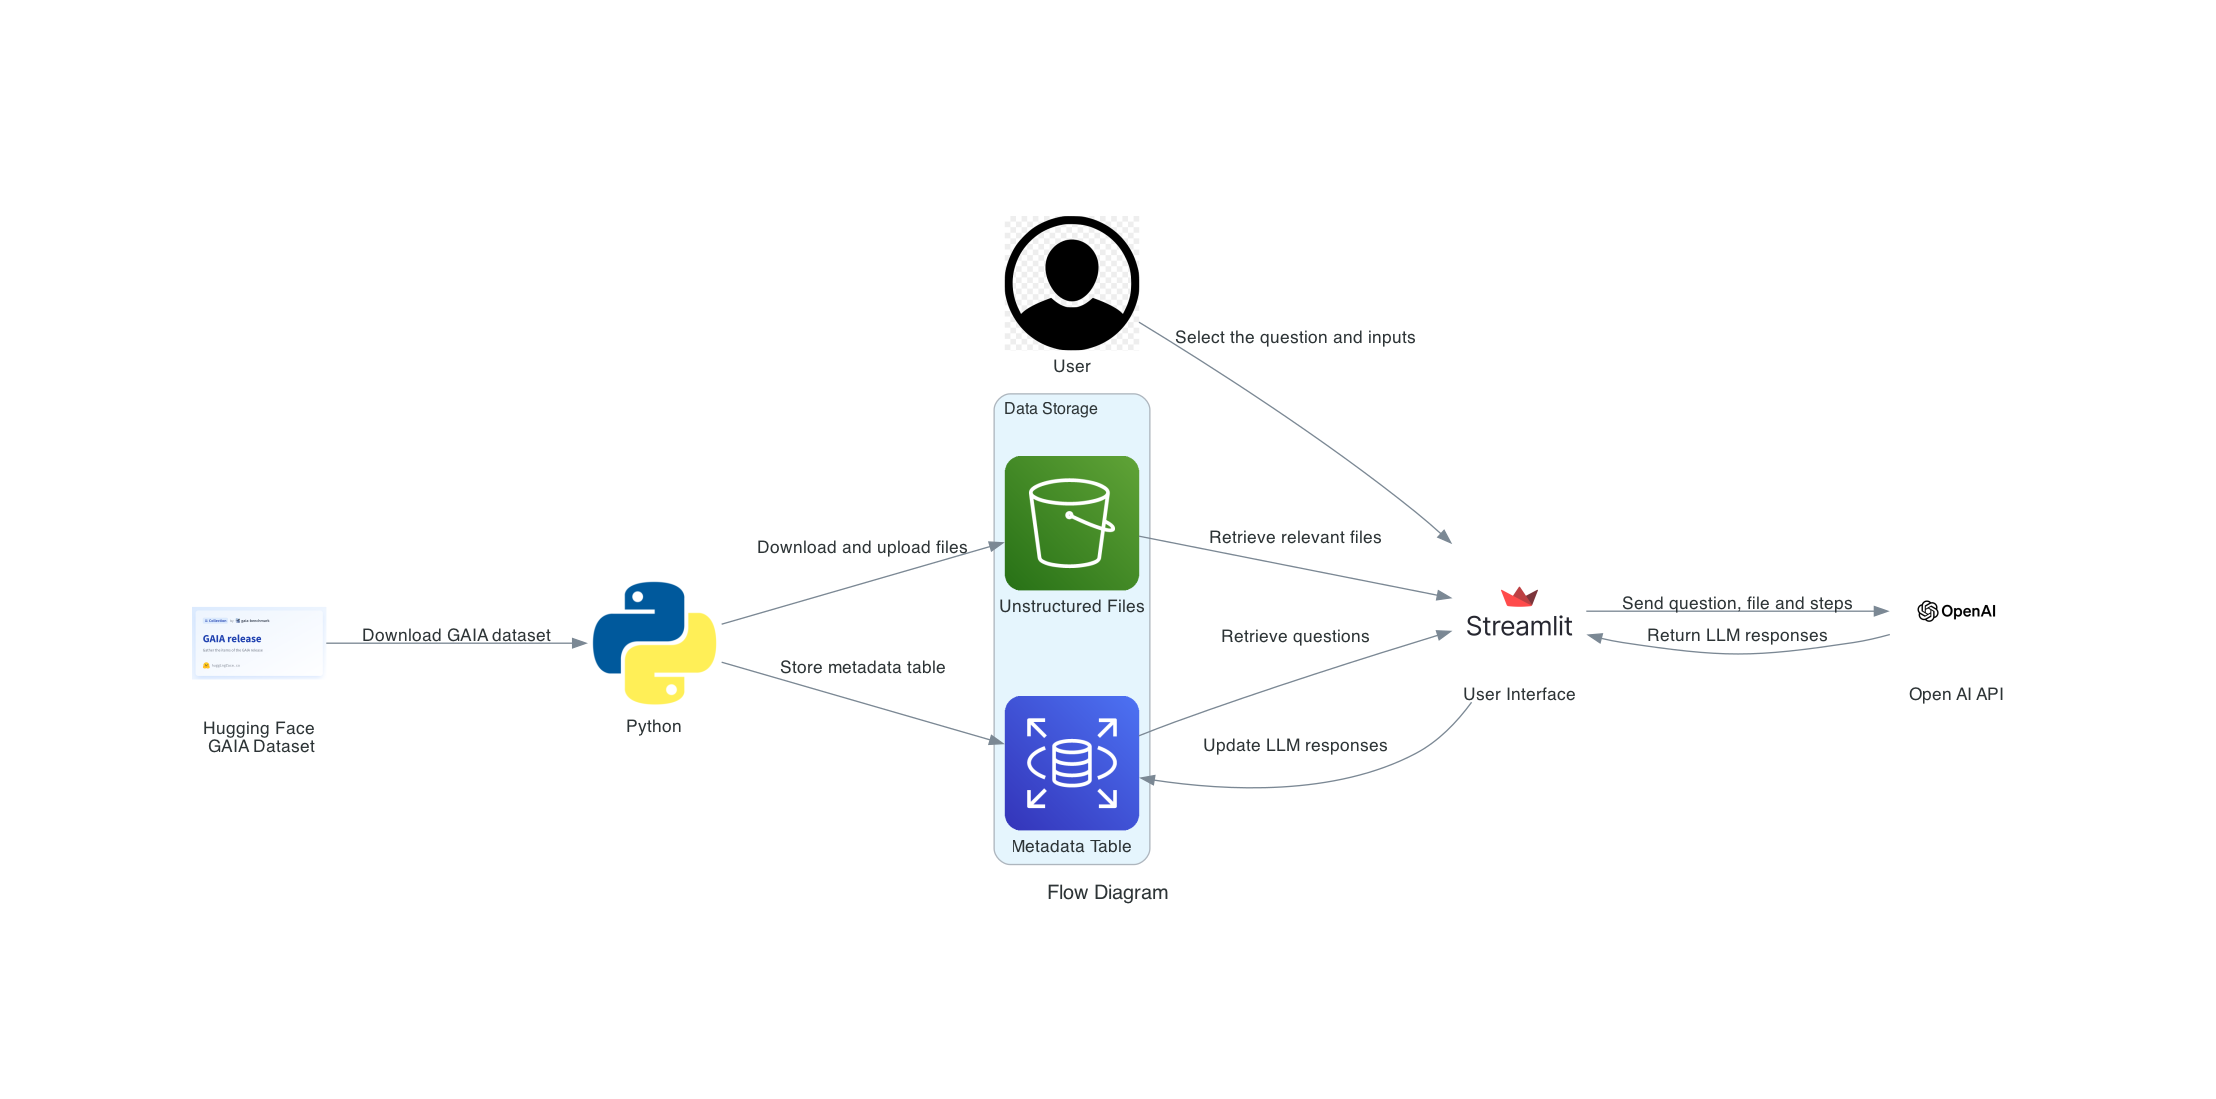

In [14]:
diag